<a href="https://colab.research.google.com/github/JuanJoseRodriguezMenendez/Rules-External_Actions/blob/master/UsandoTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importamos las librerias necesarias para la ejecucion de todo nuestro notebook

In [0]:
import warnings; warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

Subimos los archivos necesarios para el notebook

In [2]:
from google.colab import files
uploaded = files.upload()

Saving sample.csv to sample.csv
Saving test.csv to test.csv
Saving train.csv to train.csv



Cargamos y tratamos nuestro dataset de entrenamiento para poder usarlo mediante los distintos algoritmos de clasificacion

In [0]:
df = pd.read_csv('train.csv')
df['Prediction'] = df['Prediction'].astype('int64')
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
traindata = df.values
X,Y = traindata[:,0:-1],traindata[:,-1]

Separamos nuestro dataset en la parte de entrenamiento y la de testeo, la cual usaremos mas tarde para validar nuestros resultados

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
(trainData, testData, trainLabels, testLabels) = train_test_split(X,Y,test_size=0.25, random_state=42)

In [0]:
def gridsearch(model,parameters,scores,k):
    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        clf = GridSearchCV(model, parameters, cv=k,
                           scoring='%s_macro' % score)
        clf.fit(trainData, trainLabels)

        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))

Buscamos mediante gridSearch ( en parte para evitar separar el dataset en otro conjunto) los mejores parámetros para cada uno de nuestros clasificadores, se obvia SVM porque en un notebook anterior no tuvo buenos resultados

**KNN**

In [0]:
modelKNN = KNeighborsClassifier()
tuned_parameters = {'n_neighbors': range(1,100)}
scores = ['precision']

In [14]:
import time
%time
gridsearch(modelKNN,tuned_parameters,scores,5)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'n_neighbors': 51}

Grid scores on development set:

0.608 (+/-0.079) for {'n_neighbors': 1}
0.599 (+/-0.142) for {'n_neighbors': 2}
0.573 (+/-0.154) for {'n_neighbors': 3}
0.600 (+/-0.150) for {'n_neighbors': 4}
0.558 (+/-0.053) for {'n_neighbors': 5}
0.538 (+/-0.073) for {'n_neighbors': 6}
0.552 (+/-0.055) for {'n_neighbors': 7}
0.538 (+/-0.061) for {'n_neighbors': 8}
0.574 (+/-0.093) for {'n_neighbors': 9}
0.568 (+/-0.110) for {'n_neighbors': 10}
0.591 (+/-0.116) for {'n_neighbors': 11}
0.590 (+/-0.166) for {'n_neighbors': 12}
0.560 (+/-0.045) for {'n_neighbors': 13}
0.591 (+/-0.137) for {'n_neighbors': 14}
0.568 (+/-0.109) for {'n_neighbors': 15}
0.620 (+/-0.271) for {'n_neighbors': 16}
0.572 (+/-0.079) for {'n_neighbors': 17}
0.582 (+/-0.176) for {'n_neighbors': 18}
0.556 (+/-0.131) for {'n_neighbors': 19}
0.593 (+/-0.107) for {'n

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**Árboles de decisión**

In [0]:
modelArbol = DecisionTreeClassifier()
tuned_parameters = {'min_samples_split': range(2,50)}

In [18]:
import time
%time
gridsearch(modelArbol,tuned_parameters,scores,5)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
# Tuning hyper-parameters for precision



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set found on development set:

{'min_samples_split': 10}

Grid scores on development set:

0.576 (+/-0.094) for {'min_samples_split': 2}
0.568 (+/-0.066) for {'min_samples_split': 3}
0.587 (+/-0.103) for {'min_samples_split': 4}
0.592 (+/-0.073) for {'min_samples_split': 5}
0.581 (+/-0.081) for {'min_samples_split': 6}
0.584 (+/-0.060) for {'min_samples_split': 7}
0.584 (+/-0.051) for {'min_samples_split': 8}
0.586 (+/-0.069) for {'min_samples_split': 9}
0.595 (+/-0.063) for {'min_samples_split': 10}
0.587 (+/-0.051) for {'min_samples_split': 11}
0.585 (+/-0.060) for {'min_samples_split': 12}
0.586 (+/-0.083) for {'min_samples_split': 13}
0.580 (+/-0.088) for {'min_samples_split': 14}
0.557 (+/-0.062) for {'min_samples_split': 15}
0.569 (+/-0.067) for {'min_samples_split': 16}
0.573 (+/-0.079) for {'min_samples_split': 17}
0.559 (+/-0.055) for {'min_samples_split': 18}
0.576 (+/-0.093) for {'min_samples_split': 19}
0.575 (+/-0.094) for {'min_samples_split': 20}
0.576 (+

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**Regresión logística**

In [0]:
modelLR = LogisticRegression()
tuned_parameters = {'C': [0.1,1,10,100,1000]}

In [20]:
import time
%time
gridsearch(modelLR,tuned_parameters,scores,5)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.44 µs
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1000}

Grid scores on development set:

0.608 (+/-0.192) for {'C': 0.1}
0.582 (+/-0.183) for {'C': 1}
0.606 (+/-0.174) for {'C': 10}
0.620 (+/-0.169) for {'C': 100}
0.626 (+/-0.188) for {'C': 1000}
# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 1000}

Grid scores on development set:

0.532 (+/-0.047) for {'C': 0.1}
0.532 (+/-0.062) for {'C': 1}
0.540 (+/-0.058) for {'C': 10}
0.546 (+/-0.045) for {'C': 100}
0.552 (+/-0.058) for {'C': 1000}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**Redes neuronales**

In [0]:
mLPClassifier = MLPClassifier()
tuned_parameters = {'hidden_layer_sizes': [(2),(5,2), (3,3,3), (5,3,2), (5,4,3,2)],
     'activation' : ['identity', 'logistic', 'tanh', 'relu'],
     'momentum' : [0.9,0.95,0.99],
     'learning_rate_init' : [0.001,0.01,0.1]}

In [22]:
gridsearch(mLPClassifier,tuned_parameters,scores,5)

# Tuning hyper-parameters for precision



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set found on development set:

{'activation': 'identity', 'hidden_layer_sizes': 2, 'learning_rate_init': 0.1, 'momentum': 0.9}

Grid scores on development set:

0.530 (+/-0.222) for {'activation': 'identity', 'hidden_layer_sizes': 2, 'learning_rate_init': 0.001, 'momentum': 0.9}
0.477 (+/-0.269) for {'activation': 'identity', 'hidden_layer_sizes': 2, 'learning_rate_init': 0.001, 'momentum': 0.95}
0.356 (+/-0.261) for {'activation': 'identity', 'hidden_layer_sizes': 2, 'learning_rate_init': 0.001, 'momentum': 0.99}
0.516 (+/-0.294) for {'activation': 'identity', 'hidden_layer_sizes': 2, 'learning_rate_init': 0.01, 'momentum': 0.9}
0.453 (+/-0.244) for {'activation': 'identity', 'hidden_layer_sizes': 2, 'learning_rate_init': 0.01, 'momentum': 0.95}
0.579 (+/-0.334) for {'activation': 'identity', 'hidden_layer_sizes': 2, 'learning_rate_init': 0.01, 'momentum': 0.99}
0.696 (+/-0.169) for {'activation': 'identity', 'hidden_layer_sizes': 2, 'learning_rate_init': 0.1, 'momentu

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set found on development set:

{'activation': 'identity', 'hidden_layer_sizes': (5, 3, 2), 'learning_rate_init': 0.01, 'momentum': 0.99}

Grid scores on development set:

0.529 (+/-0.072) for {'activation': 'identity', 'hidden_layer_sizes': 2, 'learning_rate_init': 0.001, 'momentum': 0.9}
0.531 (+/-0.139) for {'activation': 'identity', 'hidden_layer_sizes': 2, 'learning_rate_init': 0.001, 'momentum': 0.95}
0.589 (+/-0.113) for {'activation': 'identity', 'hidden_layer_sizes': 2, 'learning_rate_init': 0.001, 'momentum': 0.99}
0.574 (+/-0.191) for {'activation': 'identity', 'hidden_layer_sizes': 2, 'learning_rate_init': 0.01, 'momentum': 0.9}
0.509 (+/-0.097) for {'activation': 'identity', 'hidden_layer_sizes': 2, 'learning_rate_init': 0.01, 'momentum': 0.95}
0.555 (+/-0.100) for {'activation': 'identity', 'hidden_layer_sizes': 2, 'learning_rate_init': 0.01, 'momentum': 0.99}
0.572 (+/-0.173) for {'activation': 'identity', 'hidden_layer_sizes': 2, 'learning_rate_init': 0.1

Una vez hemos obtenido nuestros mejores hiperparámetros se define y entrena un clasificador (con el conjunto de entrenamiento) 

In [23]:
modelKNN = KNeighborsClassifier(n_neighbors=51)
modelKNN.fit(trainData, trainLabels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=51, p=2,
           weights='uniform')

In [24]:
modelArbol = DecisionTreeClassifier(min_samples_split=10)
modelArbol.fit(trainData, trainLabels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
modelLR = LogisticRegression(C=1000)
modelLR.fit(trainData, trainLabels)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
mLPClassifier = MLPClassifier(activation='identity', hidden_layer_sizes=2, learning_rate_init=0.1, momentum= 0.9)
mLPClassifier.fit(trainData, trainLabels)

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=2, learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Ahora validamos nuestros resultados, primero medainte la libreria sklearn y despues mediante curvas ROC, en este caso obtenemos como mejores resultados Redes neuronales y Arboles de decision

In [27]:
from sklearn.metrics import classification_report

print("EVALUACIÓN EN CONJUNTO DE TEST USANDO KNN")
predictionsKNN = modelKNN.predict(testData)
print(classification_report(testLabels, predictionsKNN))

EVALUACIÓN EN CONJUNTO DE TEST USANDO KNN
              precision    recall  f1-score   support

         0.0       0.70      0.92      0.79        77
         1.0       0.25      0.06      0.10        33

   micro avg       0.66      0.66      0.66       110
   macro avg       0.47      0.49      0.45       110
weighted avg       0.56      0.66      0.58       110



In [28]:
print("EVALUACIÓN EN CONJUNTO DE TEST USANDO Arboles de decision")
predictionsArboles = modelArbol.predict(testData)
print(classification_report(testLabels, predictionsArboles))

EVALUACIÓN EN CONJUNTO DE TEST USANDO Arboles de decision
              precision    recall  f1-score   support

         0.0       0.79      0.69      0.74        77
         1.0       0.44      0.58      0.50        33

   micro avg       0.65      0.65      0.65       110
   macro avg       0.62      0.63      0.62       110
weighted avg       0.69      0.65      0.67       110



In [29]:
print("EVALUACIÓN EN CONJUNTO DE TEST USANDO Regresión Logística")
predictionsRegres = modelLR.predict(testData)
print(classification_report(testLabels, predictionsRegres))

EVALUACIÓN EN CONJUNTO DE TEST USANDO Regresión Logística
              precision    recall  f1-score   support

         0.0       0.74      0.91      0.81        77
         1.0       0.53      0.24      0.33        33

   micro avg       0.71      0.71      0.71       110
   macro avg       0.64      0.58      0.57       110
weighted avg       0.68      0.71      0.67       110



In [30]:
print("EVALUACIÓN EN CONJUNTO DE TEST USANDO Redes neuronales")
predictionsRedes = mLPClassifier.predict(testData)
print(classification_report(testLabels, predictionsRedes))

EVALUACIÓN EN CONJUNTO DE TEST USANDO Redes neuronales
              precision    recall  f1-score   support

         0.0       0.74      0.94      0.83        77
         1.0       0.62      0.24      0.35        33

   micro avg       0.73      0.73      0.73       110
   macro avg       0.68      0.59      0.59       110
weighted avg       0.70      0.73      0.68       110



In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
%matplotlib inline
def drawROCCurves(classifiers,predictions,actualLabels):
    plt.close()
    plt.figure()
    lw = 2
    fpr = dict()
    tpr=dict()
    roc_auc =dict()
    for i,_ in enumerate(classifiers):
        fpr[i],tpr[i],_=roc_curve(actualLabels,predictions[i])
        roc_auc[i]=auc(fpr[i],tpr[i])

    colours = ['darkorange','aqua','red','green','cornflowerblue','yellow']
    for i,_ in enumerate(classifiers):
        plt.plot(fpr[i], tpr[i], color=colours[i], lw=lw, label='ROC curve %s (area = %0.2f)' % (classifiers[i],roc_auc[i]))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

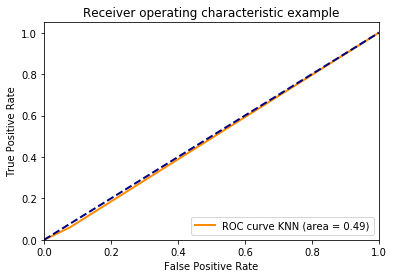

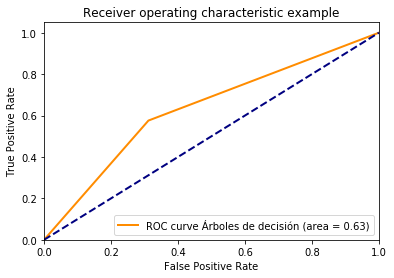

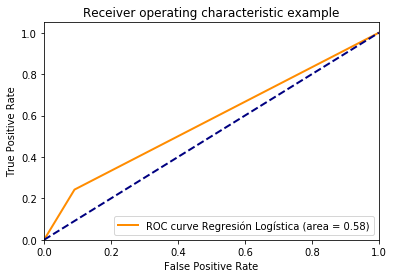

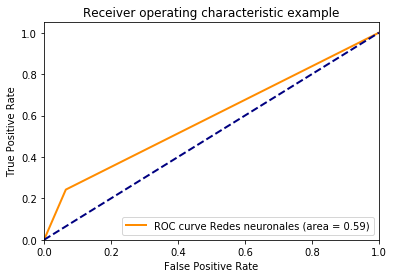

In [34]:
drawROCCurves(['KNN'],[predictionsKNN],testLabels)
drawROCCurves(['Árboles de decisión'],[predictionsArboles],testLabels)
drawROCCurves(['Regresión Logística'],[predictionsRegres],testLabels)
drawROCCurves(['Redes neuronales'],[predictionsRedes],testLabels)

Por último comparamos nuestros distintos clasificadores mediante un estudio estadístico, aquí al igual que en los notebook anteriores obtenemos como mejores clasificadores Linear regrtesion y arboles de decision

In [0]:
# Árbol de decisión
clfTree = DecisionTreeClassifier(random_state=84)
param_distTree = {'min_samples_split': range(2,50)}
# SVM
clfSVC = SVC(random_state=84)
param_distSVC = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],'kernel': ['rbf'], 'class_weight':['balanced', None]}
# KNN
clfKNN = KNeighborsClassifier()
param_distKNN = {'n_neighbors': range(1,55)}
# Regresión logística
clfLR = LogisticRegression(random_state=84)
param_distLR = {'C': [0.1,1,10,100,1000]}
# Red neuronal
clfMLP = MLPClassifier(random_state=84)
param_distMLP = {'hidden_layer_sizes': [(2),(5,2), (3,3,3), (5,3,2), (5,4,3,2)],
     'activation' : ['identity', 'logistic', 'tanh', 'relu'],
     'momentum' : [0.9,0.95,0.99],
     'learning_rate_init' : [0.001,0.01,0.1]}

In [36]:
!pip install StatisticalAnalysis
from StatisticalAnalysis import compare_methods

  Stored in directory: /root/.cache/pip/wheels/ad/00/5e/9acdf6ea47e291b77a1c2bbe4e498a8e4ad955adff16f90dd2
Successfully built StatisticalAnalysis


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The def

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.414800 (0.190600)
SVM: 0.086081 (0.143300)
KNN: 0.340357 (0.332003)
LR: 0.543333 (0.338641)
MLP: 0.386658 (0.243578)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.911941, p:0.001221
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.673304, p:0.043918
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfilled, applying a non-parametric test
-----------------------

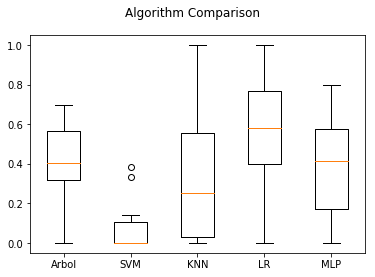

In [37]:
listAlgorithms = [clfTree,clfSVC,clfKNN,clfLR,clfMLP]
listParams = [param_distTree,param_distSVC,param_distKNN,param_distLR,param_distMLP]
listNames = ["Arbol", "SVM", "KNN", "LR", "MLP"]
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='precision')

Como se tienen dudas de que clasificador usar debido a que se obtienen distintos resultados tanto usando la libreía sklear como las curvas y el estudio estadístico se recupera de la práctica7 el evaluador manual para obtener otro resultado, que decanta la valanza a favor de las redes neuronales

In [0]:
def evalua(clasificador,testData,testLabels):
  predicts = clasificador.predict(testData)
  contador=0
  for i,j in zip(testLabels,predicts):
    if i == j:
      contador+=1
  return contador

In [41]:
res2 = str(evalua(modelKNN ,testData,testLabels)) + " modelKNN "
res3 = str(evalua(modelArbol ,testData,testLabels)) + " modelArbol "
res4 = str(evalua(modelLR ,testData,testLabels)) + " modelLR "
res5 = str(evalua(mLPClassifier ,testData,testLabels)) + " mLPClassifier "
print(max(res2,res3,res4,res5))

80 mLPClassifier 
